<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

## Taux de CO2, place de la Nation, Paris

Dans cette partie vous allez représenter par mois ou par jour le taux de CO2, place de la nation à Paris. Les données utilisées sont téléchargeables sur le site [ParisDATA](https://opendata.paris.fr). 

https://opendata.paris.fr/explore/dataset/place-de-la-nation-co2/

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
sns.set(style="whitegrid", font_scale=1.5)

### Lecture du fichier

<div class="alert alert-success" style="margin-top:20px">
    <b>Exercice :</b> Lire le fichier <code>place-de-la-nation-co2.csv</code> avec pandas.
</div>

**Aide/conseils :***

* Vérifiez le séparateur
* Choisir comme `index` la colonne `Timestamp`
* La colonne `Timestamp` contient des dates
* Les valeurs nulles `"0.0"` sont des valeurs manquantes. Regarder `na_values` dans la documentation.

In [2]:
df_co2 = pd.read_csv(
    "place-de-la-nation-co2.csv", 
    sep=";", 
    parse_dates=["Timestamp"], 
    index_col="Timestamp", 
    na_values="0.0"
)
df_co2.head()

measure               filters  value
Timestamp                                                       
2016-04-28 04:00:00  breezometer.co  host.CISCO_PARIS_005    NaN
2016-04-28 06:00:00  breezometer.co  host.CISCO_PARIS_005    NaN
2016-04-28 07:00:00  breezometer.co  host.CISCO_PARIS_005    NaN
2016-04-28 18:00:00  breezometer.co  host.CISCO_PARIS_005    NaN
2016-04-29 06:00:00  breezometer.co  host.CISCO_PARIS_005    NaN

### Taux de CO2 moyen par mois

L'objectif de cette partie est de faire un histogramme du taux de CO2 moyen par mois.

<div class="alert alert-success" style="margin-top:20px;">

<b>Faire les opérations suivantes :</b>
    <ul>
        <li>Ajouter une colonne avec le mois</li>
        <li>Extraire un tableau en faisant la moyenne du taux de CO2 par mois (`groupby`).</li>
        <li>Représenter les données sous formes d'un histogramme.</li>
    </ul>
</div>

**Aide :**

* df.index.month donne numero du mois. Essayez avec hour, day, ...
* La moyenne se calcule avec `np.mean`

In [3]:
df_co2["mois"] = df_co2.index.month
df_co2.head()

measure               filters  value  mois
Timestamp                                                             
2016-04-28 04:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4
2016-04-28 06:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4
2016-04-28 07:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4
2016-04-28 18:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4
2016-04-29 06:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4

On va afficher le nombre de mesure par mois :

In [4]:
df_co2.groupby("mois", sort=True).aggregate({"value": "count"}) # sort = True est le défaut

value
mois       
1        31
2        39
3        24
4        24
5       396
6       312
7        24
8        24
9        24
10       24
11       24
12       24

On voit que les données sont très hétérogènes. Il y a beaucoup plus de valeur sur les mois de Mai et Juin.

Faisons maintenant la moyenne par mois.

In [5]:
mois_co2 = df_co2.groupby(by="mois").aggregate({"value":"mean"})
mois_co2

value
mois             
1     1042.289848
2      841.688578
3     1362.599306
4     1295.065972
5     1328.453241
6     1336.786912
7     1488.200000
8     1379.502083
9     1280.535417
10    1338.016667
11    1241.147917
12    1217.160417

On va utiliser module calendar pour affecter comme index le nom des mois.

```py
In [1]: calendar.month_name[1:]
```

    Out[1]: ['January',
             'February',
             'March',
             'April',
             'May',
             'June',
             'July',
             'August',
             'September',
             'October',
             'November',
             'December']

Il suffit de donner cette liste comme index :

In [6]:
mois_co2.index = calendar.month_name[1:]
mois_co2

value
January    1042.289848
February    841.688578
March      1362.599306
April      1295.065972
May        1328.453241
June       1336.786912
July       1488.200000
August     1379.502083
September  1280.535417
October    1338.016667
November   1241.147917
December   1217.160417

##### Remarque :

Pour information, on peut utiliser la fonction `apply`, en association avec le module calendar, pour ajouter une colonne non pas avec le numéro du mois mais avec son nom. L'avantage de travailler avec le numéro est que l'on peut trier les mois ou les classer de janvier à décembre.

On utilise `apply` avec :

* axis=1 pour parcourir les lignes
* row désigne une ligne
* row.name est le "nom" de la ligne c'est à dire l'index

In [7]:
df_co2["nom_mois"] = df_co2.apply(lambda row: calendar.month_name[row.name.month], axis=1)
df_co2.head()

measure               filters  value  mois  \
Timestamp                                                                
2016-04-28 04:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4   
2016-04-28 06:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4   
2016-04-28 07:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4   
2016-04-28 18:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4   
2016-04-29 06:00:00  breezometer.co  host.CISCO_PARIS_005    NaN     4   

                    nom_mois  
Timestamp                     
2016-04-28 04:00:00    April  
2016-04-28 06:00:00    April  
2016-04-28 07:00:00    April  
2016-04-28 18:00:00    April  
2016-04-29 06:00:00    April

### Construction du graphique

On construit un diagramme en barre avec le taux moyen de CO2 pour chaque mois.

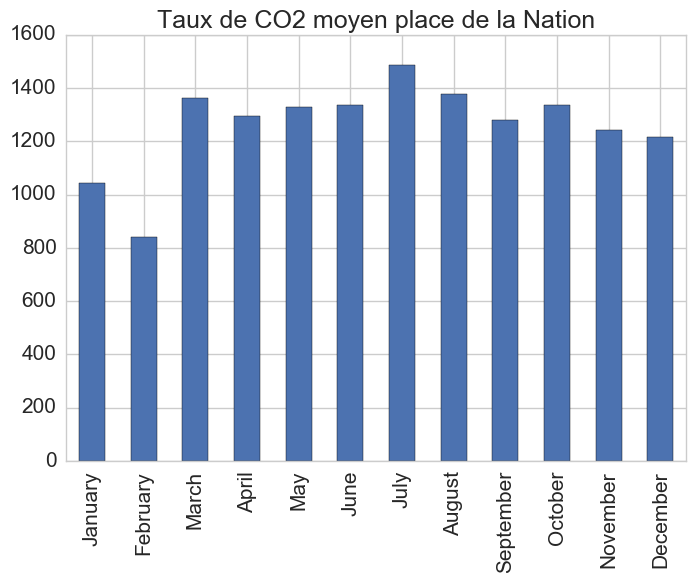

In [8]:
mois_co2.plot(kind="bar", title="Taux de CO2 moyen place de la Nation", legend=False)

Il semble que le taux de CO2 soit un peu plus faible durant les mois de janvier et février. Cependant, les données étaient assez pauvres ces deux mois.

### Taux de CO2 médian les jours de la semaine

L'objectif de cette partie est de faire un histogramme du taux de CO2 median suivant les jours de la semaine durant le mois de Juin.

<div class="alert alert-success" style="margin-top:20px;">

<b>Faire les opérations suivantes :</b>
    <ul>
        <li>Ajouter une colonne avec le jour de la semaine : <code>weekday</code></li>
        <li>Extraire un tableau en faisant calculant la médianne du taux de CO2 pour chaque jour en ayant tout d'abord sélectionné le mois de juin.</li>
        <li>Représenter les données sous formes d'histogrammes.</li>
    </ul>
</div>

**Aide :**

* Vous pouvez utiliser le module calendar pour récupérer le nom des mois ou des jours.
* La médianne se calcule avec `np.median`

<div class="alert alert-info" style="margin-top:20px;">
Pour bien comprendre la correction exécuter les lignes une par une et afficher le résultat.
</div>

In [9]:
# on fait une copy de la data frame
jours_co2 = df_co2.copy()
# on ajoute une colonne avec le numéro du jour de la semaine
jours_co2["jour"] = df_co2.index.weekday
# de gauche à droite :
#    * on sélectionne la partie de la data frame pour le mois de juin: month = 6
#    * on groupe sur la colonne jour
#    * on calcule la médianne sur la colonne "value"
jours_co2 = jours_co2[jours_co2.index.month == 6].groupby("jour", sort=True).aggregate({"value": "median"})
# on remplace l'index par les noms des jours
jours_co2.index = calendar.day_name
# on affiche la data frame !
jours_co2

value
Monday     1270.000000
Tuesday    1267.700000
Wednesday  1387.650000
Thursday   1340.050000
Friday     1265.375000
Saturday   1219.250000
Sunday     1211.866667

La partie la plus simple est la construction du graphique :

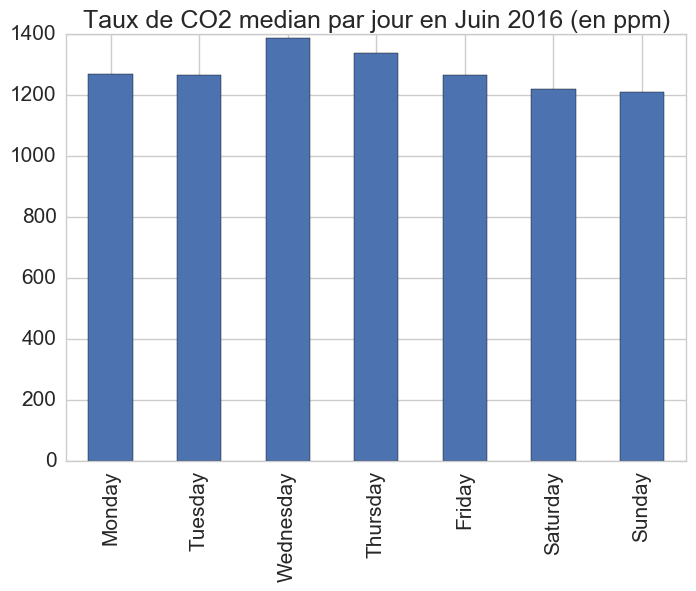

In [10]:
jours_co2.plot.bar(legend=False, title="Taux de CO2 median par jour en Juin 2016 (en ppm)")

Le taux de CO2 semble plus important le mercredi, mais la variation est-elle significative ?

## Température, place de la Nation, Paris

Reprennons ce que nous avons fait précédemment mais concernant maintenant la température moyenne.

https://opendata.paris.fr/explore/dataset/place-de-la-nation-temperature/

### Lecture du fichier csv

<div class="alert alert-success" style="margin-top:20px">
    <b>Exercice :</b> Lire le fichier <code>place-de-la-nation-temperature.csv</code> avec pandas.
</div>


In [11]:
df_temp = pd.read_csv(
    "place-de-la-nation-temperature.csv", 
    sep=";", 
    parse_dates=["timestamp"], 
    index_col="timestamp", 
    na_values="0.0"
)
df_temp.head()

measure               filters      value
timestamp                                                             
2016-06-13 09:00:00  breezometer.temp  host.CISCO_PARIS_005  18.057500
2016-06-14 04:00:00  breezometer.temp  host.CISCO_PARIS_005  15.312500
2016-06-14 05:00:00  breezometer.temp  host.CISCO_PARIS_005  15.602000
2016-06-14 07:00:00  breezometer.temp  host.CISCO_PARIS_005  16.787499
2016-06-14 15:00:00  breezometer.temp  host.CISCO_PARIS_005  20.357500

### Température par mois

Construire un diagramme en barre de la température moyenne par mois.

<div class="alert alert-info" style="margin-top:20px">
    <b>Challenge</b> Vous pouvez le faire en une ligne si vous affichez le numéro du mois, trois avec le nom du jour.
</div>


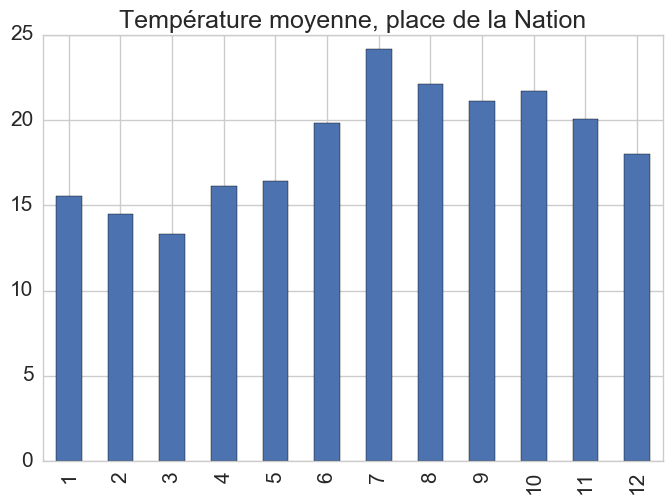

In [12]:
df_temp.groupby(by=df_temp.index.month, sort=True).aggregate({"value": "mean"}).plot.bar(
    title="Température moyenne, place de la Nation", 
    legend=False
)

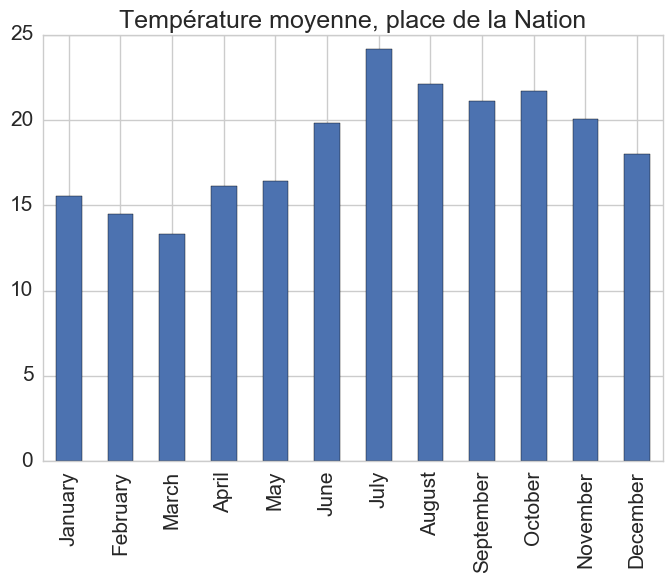

In [13]:
df_temp_mois = df_temp.groupby(by=df_temp.index.month, sort=True).aggregate({"value": "mean"})
df_temp_mois.index = calendar.month_name[1:]
df_temp_mois.plot.bar(title="Température moyenne, place de la Nation", legend=False)